In [1]:
from ehrhart_polynomial import *
from gfan.gfan import *

In [2]:
T = PolynomialRing(QQ, "t")
t = T.gen()

R = PolynomialRing(T, "k")
k = R.gen()

In [3]:
A = Matrix([[-1,  0],
            [ 0, -1],
            [ 0,  1],
            [ 1,  1]])
b = free_module_element([0, 0, 1, 2])

In [4]:
def create_polyhedron(A, b):
    """  Ax <= b  """
    inequalities = [[b[k]] + list(-A.rows()[k]) for k in range(A.nrows())]
    return Polyhedron(ieqs = inequalities)

In [5]:
poly = create_polyhedron(A, b)

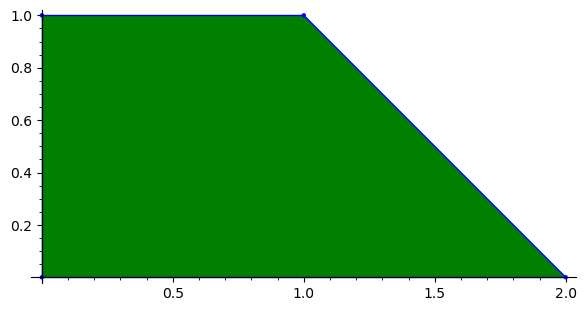

In [6]:
poly.plot()

In [7]:
print(ehrhart_polynomial(poly.Vrepresentation()))

QuasiPolynomial given by 
1.0 + 2.5*k + 1.5*k^2


In [7]:
fan = secondary_fan(A)
fan

{'AMBIENT_DIM': 4,
 'DIM': 4,
 'LINEALITY_DIM': 2,
 'RAYS': [(-1, -1, 2, 3), (1, 1, 3, 2), (2, 2, 1, -1)],
 'N_RAYS': 3,
 'LINEALITY_SPACE': [ 1  0 -1  1]
 [ 0  1 -1  1],
 'ORTH_LINEALITY_SPACE': [ 1  1  0 -1]
 [ 0  0  1  1],
 'F_VECTOR': (1, 3, 2),
 'SIMPLICIAL': 1,
 'PURE': 1,
 'CONES': [0-d cone in 1-d lattice N,
  1-d cone in 4-d lattice N,
  1-d cone in 4-d lattice N,
  1-d cone in 4-d lattice N,
  2-d cone in 4-d lattice N,
  2-d cone in 4-d lattice N],
 'MAXIMAL_CONES': [2-d cone in 4-d lattice N, 2-d cone in 4-d lattice N]}

In [8]:
def chamber_points(cones):
    """
    Gives a list of points for every chamber of the secondary fan
    """
    points = []
    for max_cone in cones:
        points.append(sum(max_cone.rays()))
    return points

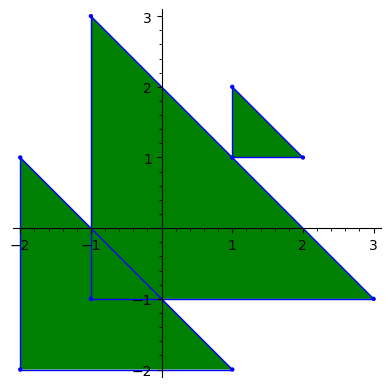

In [10]:
g = Graphics()
points = fan["RAYS"]
for point in points:
    qoly = create_polyhedron(A, point)
    g += qoly.plot()
g.show()

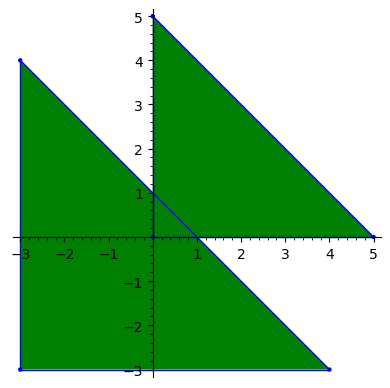

In [11]:
g = Graphics()
points = chamber_points(fan["MAXIMAL_CONES"])
for point in points:
    qoly = create_polyhedron(A, point)
    g += qoly.plot()
g.show()

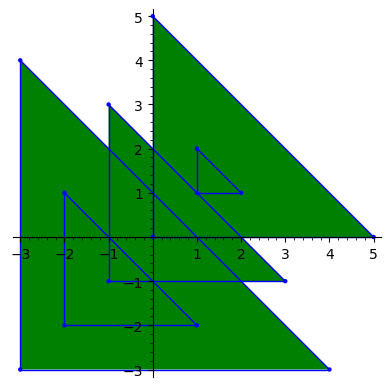

In [11]:
g = Graphics()
points = chamber_points(fan["CONES"][1:])
for point in points:
    qoly = create_polyhedron(A, point)
    g += qoly.plot()
g.show()

In [12]:
def modular_b(A, base_b, indeces=[0], expected_degree=2):
    dim_points = A.ncols()
    dim_b = len(base_b)
    mins, maxs = [0]*dim_b, [0]*dim_b
    value = expected_degree
    for index in indeces:
        maxs[index] = value

    return get_bounding_box(mins, maxs, 1)

for delta_b = (0, 0, 0, 0):
QuasiPolynomial given by 
1.0 + 2.5*k + 1.5*k^2

for delta_b = (0, 0, 0, 1):
QuasiPolynomial given by 
1.0 + 3.5*k + 2.5*k^2

for delta_b = (0, 0, 0, 2):
QuasiPolynomial given by 
1.0 + 4.5*k + 3.5*k^2

for delta_b = (0, 0, 0, 3):
QuasiPolynomial given by 
1.0 + 5.5*k + 4.5*k^2



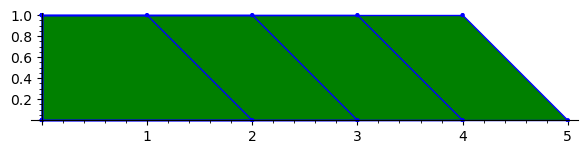

In [13]:
"""
We vary the fourth component of b = (0, 0, 1, 2).
I.e., we consider Ax <= (0, 0, 1, 2+t) where t is a positive integer.
"""
g = Graphics()
points = modular_b(A, b, indeces=[3], expected_degree=3)
for point in points:
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    print(ehrhart_polynomial(qoly.Vrepresentation()))
    print()
g.show()

In [14]:
"""
We get that the ehrahrt_polynomial is 
    1 + (2.5 + t)k + (1.5 + t)k^2
"""
print(ehrhart_polynomial(create_polyhedron(A, b + free_module_element([0, 0, 0, 10])).Vrepresentation()))

QuasiPolynomial given by 
1.0 + 12.5*k + 11.5*k^2


for delta_b = (0, 0, 0, 0):
QuasiPolynomial given by 
1.0 + 2.5*k + 1.5*k^2

for delta_b = (0, 0, 1, 0):
QuasiPolynomial given by 
1.0 + 3.0*k + 2.0*k^2



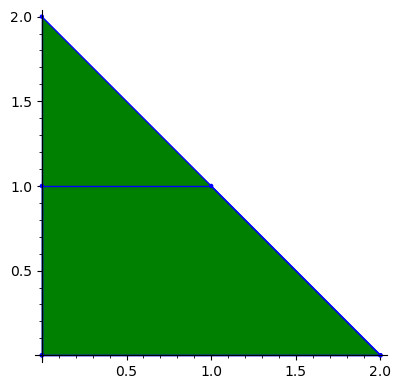

In [15]:
"""
We vary the third component of b = (0, 0, 1, 2).
I.e., we consider Ax <= (0, 0, 1+t, 2) where t is a positive integer.
"""
g = Graphics()
points = modular_b(A, b, indeces=[2], expected_degree=1)
for point in points:
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    print(ehrhart_polynomial(qoly.Vrepresentation()))
    print()
g.show()

In [16]:
"""
First, notice thatfor delta_b = (0, 0, 1, 0) and delta_b = (0, 0, 2, 0) we get the same polytope and thus also
the same ehrhart_polynomial, and also for all delta_b where the third component is larger than 2.

We get that the ehrhart polynomial is
    1 + (2.5 + t/2)k + (1.5 + t/2)k^2
for t = 0, 1
"""
print(ehrhart_polynomial(create_polyhedron(A, b + free_module_element([0, 0, 10, 0])).Vrepresentation()))

QuasiPolynomial given by 
1.0 + 3.0*k + 2.0*k^2


for delta_b = (0, 0, 0, 0):
QuasiPolynomial given by 
1.0 + 2.5*k + 1.5*k^2

for delta_b = (0, 0, 1, 1):
QuasiPolynomial given by 
1.0 + 4.0*k + 4.0*k^2

for delta_b = (0, 0, 2, 2):
QuasiPolynomial given by 
1.0 + 5.5*k + 7.5*k^2

for delta_b = (0, 0, 3, 3):
QuasiPolynomial given by 
1.0 + 7.0*k + 12.0*k^2

for delta_b = (0, 0, 4, 4):
QuasiPolynomial given by 
1.0 + 8.5*k + 17.5*k^2

for delta_b = (0, 0, 5, 5):
QuasiPolynomial given by 
1.0 + 10.0*k + 24.0*k^2



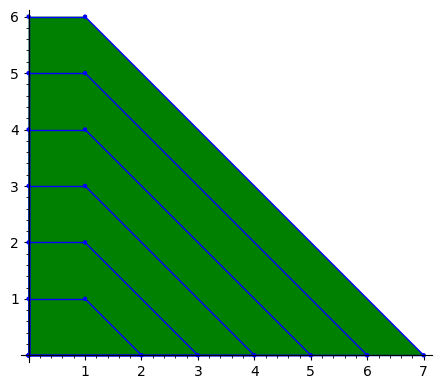

In [17]:
"""
Can we combine these two results?
"""
g = Graphics()
for i in range(6):
    point = i*free_module_element([0, 0, 1, 1])
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    print(ehrhart_polynomial(qoly.Vrepresentation()))
    print()
g.show()

In [18]:
t_poly = T.lagrange_polynomial([[0, 1.5], [1, 4], [2, 7.5], [3, 12]])
print(t_poly)
"""
We get that the ehrahrt_polynomial is 
    1 + (2.5 + 1.5t)k + t_poly*k^2
"""
print(ehrhart_polynomial(create_polyhedron(A, b + free_module_element([0, 0, 5, 5])).Vrepresentation()))
poly = 1 + (2.5 + 1.5*t)*k + (t_poly)*k**2
poly(k=k, t=5)

1/2*t^2 + 2*t + 3/2
QuasiPolynomial given by 
1.0 + 10.0*k + 24.0*k^2


24.0000000000000*k^2 + 10.0000000000000*k + 1.00000000000000

In [19]:
print(ehrhart_polynomial(create_polyhedron(A, b + free_module_element([0, 0, 10, 10])).Vrepresentation()))
print(poly(k=k, t=10))

QuasiPolynomial given by 
1.0 + 17.5*k + 71.5*k^2
71.5000000000000*k^2 + 17.5000000000000*k + 1.00000000000000


for delta_b = (0, 0, 0, 0):
QuasiPolynomial given by 
1.0 + 2.5*k + 1.5*k^2

for delta_b = (0, 0, 1, 2):
QuasiPolynomial given by 
1.0 + 5.0*k + 6.0*k^2

for delta_b = (0, 0, 2, 4):
QuasiPolynomial given by 
1.0 + 7.5*k + 13.5*k^2

for delta_b = (0, 0, 3, 6):
QuasiPolynomial given by 
1.0 + 10.0*k + 24.0*k^2

for delta_b = (0, 0, 4, 8):
QuasiPolynomial given by 
1.0 + 12.5*k + 37.5*k^2

for delta_b = (0, 0, 5, 10):
QuasiPolynomial given by 
1.0 + 15.0*k + 54.0*k^2



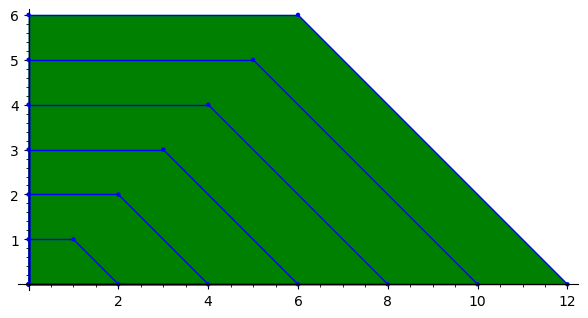

In [20]:
g = Graphics()
for i in range(6):
    point = i*free_module_element([0, 0, 1, 2])
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    print(ehrhart_polynomial(qoly.Vrepresentation()))
    print()
g.show()

In [21]:
linear_poly = T.lagrange_polynomial([[0, 2.5], [1, 5], [2, 7.5], [3, 10]])
square_poly = T.lagrange_polynomial([[0, 1.5], [1, 6], [2, 13.5], [3, 24]])
print(f"linear k-term: {linear_poly}, quadratic k-term: {square_poly}")
"""
We get that the ehrahrt_polynomial is 
    1 + linear_poly*k + square_poly*k^2
"""
print(ehrhart_polynomial(create_polyhedron(A, b + free_module_element([0, 0, 10, 20])).Vrepresentation()))
poly = 1 + (linear_poly)*k + (square_poly)*k^2
print(poly(k=k, t=10))

linear k-term: 5/2*t + 5/2, quadratic k-term: 3/2*t^2 + 3*t + 3/2
QuasiPolynomial given by 
1.0 + 27.5*k + 181.5*k^2
363/2*k^2 + 55/2*k + 1


In [15]:
x, y = var("x y")

In [16]:
""" bivariate interpolator """
def bivariate_terms(degree=2):
    terms = []
    for i in range(degree, -1, -1):
        for j in range(i + 1):
            terms.append(x**(i - j) * y**(j))

    return lambda a, b: [term.subs(x=a, y=b) for term in terms]

def interpolant(values, determinant, dets):
    func = 0
    for val, det in zip(values, dets):
        func += val*det/determinant
    return func

def bivariate_interpolator(points, values, degree=2):
    min_num = factorial(degree + 2)/(factorial(degree)*2) # in general: (degree + n_variables) choose degree
    if len(points) < min_num:
        raise ValueError(f"points needs to have at least {min_num} elements, but has {len(points)}")

    if len(values) < min_num:
        raise ValueError(f"values needs to have at least {min_num} elements, but has {len(values)}")

    points = points[:min_num]
    values = values[:min_num]

    bi_poly = bivariate_terms(degree)

    rows = []
    for point in points:
        rows.append(bi_poly(*point))
    matrix = Matrix(rows)
    determinant = matrix.determinant()

    if determinant == 0:
        raise ValueError(f"The determinant of the matrix is 0, cannot proceede. Matrix: \n{matrix}")

    dets = []
    indeterminant = bi_poly(x, y)
    for k in range(min_num):
        temp_matrix = Matrix([*matrix[:k], indeterminant, *matrix[k+1:]])
        dets.append(temp_matrix.determinant())

    return interpolant(values, determinant, dets)

In [17]:
def random_function_1(x, y):
    return x + y**2

points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [0, 2], [2, 2]]
values = [random_function_1(*p) for p in points]

bivariate_interpolator(points, values)

y^2 + x

def random_function_2(x, y):
    return x + y**2 + x**3

points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 1], [1, 2], [2, 2], [3, 1], [1, 3], [3, 2], [2, 3]]
values = [random_function_2(*p) for p in points]

bivariate_interpolator(points, values, 3)

In [26]:
b_0, b_1, b_2, b_3 = var("b_0 b_1 b_2 b_3")

In [27]:
def count_points(A, b, dim):
    poly = create_polyhedron(A, b)
    vertices = poly.vertices()
    mi, ma = get_bounding_extrema(vertices, dim)
    box = get_bounding_box(mi, ma, 1)
    return points_contained(poly, box)

In [28]:
base_b = free_module_element((0, 0, 1, 2))
delta_b = [[0, 0], [1, 0], [0, 1], [1, 1], [2, 1], [1, 2]]

b_vals = [base_b + free_module_element((0, 0, *delta)) for delta in delta_b]
values = [count_points(A, b, 2) for b in b_vals]

points = [b[2:] for b in b_vals]
bivariate = bivariate_interpolator(points, values, 2)(x=b_2, y=b_3)
bivariate

-1/2*b_2^2 + b_2*b_3 + 1/2*b_2 + b_3 + 1

for delta_b = (0, 0, 0, 0):
5.0
5

for delta_b = (0, 0, 1, 1):
9.0
9

for delta_b = (0, 0, 2, 2):
14.0
14

for delta_b = (0, 0, 3, 3):
20.0
20

for delta_b = (0, 0, 4, 4):
27.0
27

for delta_b = (0, 0, 5, 5):
35.0
35



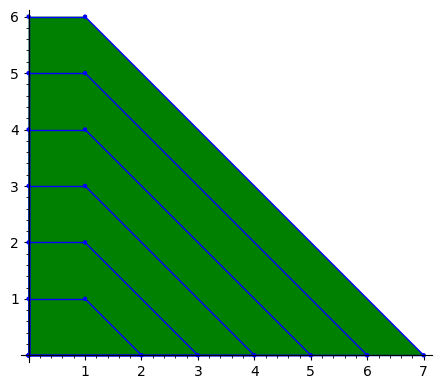

In [29]:
g = Graphics()
for i in range(6):
    point = i*free_module_element([0, 0, 1, 1])
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    ehr = ehrhart_polynomial(qoly.Vrepresentation())
    print(ehr(1))
    print(bivariate(b_2=point[2]+1, b_3=point[3]+2)) # +1/+2 since point is only a displacement of b=(0, 0, 1, 2)
    print()
g.show()

for delta_b = (0, 0, 0, 0):
5.0
5

for delta_b = (0, 0, 0, 1):
7.0
7

for delta_b = (0, 0, 0, 2):
9.0
9

for delta_b = (0, 0, 0, 3):
11.0
11



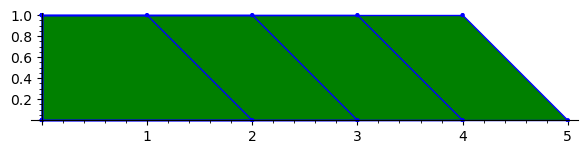

In [30]:
g = Graphics()
points = modular_b(A, b, indeces=[3], expected_degree=3)
for point in points:
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    ehr = ehrhart_polynomial(qoly.Vrepresentation())
    print(ehr(1))
    print(bivariate(b_2=point[2]+1, b_3=point[3]+2)) # +1/+2 since point is only a displacement of b=(0, 0, 1, 2)
    print()
g.show()

for delta_b = (0, 0, 0, 0):
5.0
5

for delta_b = (0, 0, 1, 0):
6.0
6

for delta_b = (0, 0, 2, 0):
6.0
6

for delta_b = (0, 0, 3, 0):
6.0
5



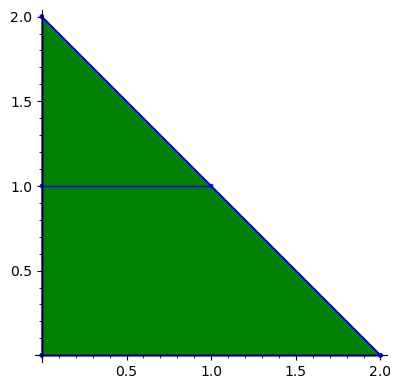

In [31]:
delta_b = modular_b(A, b, indeces=[2], expected_degree=3)
g = Graphics()
for delta in delta_b:
    print(f"for delta_b = {delta}:")
    qoly = create_polyhedron(A, b + free_module_element(delta))
    g += qoly.plot()
    ehr = ehrhart_polynomial(qoly.Vrepresentation())
    print(ehr(1))
    print(bivariate(b_2=delta[2]+1, b_3=delta[3]+2))
    print()
g.show()

In [32]:
""" formula for a triangle where the axes define 2 sides """
A_tri = Matrix([[ 0, -1],
                [-1,  0],
                [ x,  y]])

In [33]:
# We have 3 variables, and I expect a quadratic polynomial in 3 variabels, so we need (2+3) choose 2 points to interpolate:
factorial(2+3)/(factorial(3)*factorial(2))

10

In [50]:
def generate_triangle_points(sides, bs):
    third_sides = [[0, 0], [1, 1], [1, 2], [2, 1], [1, 3], [2, 2], [1, 4], [2, 3], [1, 5], [3, 3]]
    b_values = [3, 3, 4, 4, 6]

    third_slice = third_sides
    b_slice = b_values
    points = []
    for k, third in enumerate(third_slice):
        #for b in b_slice:
            point = third + [b_values[k%5]]
            points.append(point)
    return third_slice, b_slice, points

In [51]:
thirds, bs, tri_points = generate_triangle_points(6, 2)
tri_points = tri_points
tri_points

[[0, 0, 3],
 [1, 1, 3],
 [1, 2, 4],
 [2, 1, 4],
 [1, 3, 6],
 [2, 2, 3],
 [1, 4, 3],
 [2, 3, 4],
 [1, 5, 4],
 [3, 3, 6]]

In [43]:
x, y, z = var("x y z")
trivariate_pols = [x**2, x*y, y**2, x*z, z**2, y*z, x, y, z, 1]
tri_terms = lambda a, b, c: [term.subs(x=a, y=b, z=c) for term in trivariate_pols]

In [52]:
A_tri = Matrix([[ 0, -1],
                    [-1,  0],
                    [ 0,  0]])
b_tri = [0, 0, 0]

counts = []
for k, point in enumerate(tri_points):
        A_tri[2] = point[:2]
        b_tri[2] = point[2]
        count = count_points(A_tri, b_tri, 1)
        print(count)
        counts.append(count)
counts

0
0
0
0
0


TypeError: unable to convert rational 5/2 to an integer

In [39]:
def triangle_formula(points):
    A_tri = Matrix([[ 0, -1],
                    [-1,  0],
                    [ 0,  0]])
    b_tri = [0, 0, 0]
    
    matrix = Matrix([tri_terms(*point) for point in points])
    determinant = matrix.determinant()
    if determinant == 0:
        raise ValueError(f"The determinant is 0, cannot proceed. matrix: \n{matrix}")

    counts = []
    dets = []
    for k, point in enumerate(points):
        A_tri[2] = point[:2]
        b_tri[2] = point[2]
        counts.append(count_points(A_tri, b_tri, 1))
    return counts

    if True:
        temp_matrix = Matrix([*matrix[:k], trivariate_pols, *matrix[k+1:]])
        dets.append(temp_matrix.determinant())
    
    return interpolant(counts, determinant, dets)

In [40]:
triangle_formula(tri_points) # needs 5GB of RAM # and crashes currently
# and need most likely multivariate quasi-polynomial class (even within a chamber)

TypeError: unable to convert rational 7/2 to an integer

In [ ]:
""" formula for a quadrilateral where the axes define 2 sides """